In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns   
#스케일러
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [8]:
#그래프에서 한글 꺠짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,911 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [9]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/iris_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/iris_test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/IRIS/data/sample_submission.csv')

#데이터 모든 열을 출력하는 코드
pd.set_option('display.max_rows', None)

#1. iris_train.csv : 학습 데이터

id: 데이터 고유 id

species: 붓꽃의 종류 (versicolor, setosa, virginica 중 하나)

sepal length (cm) : 붓꽃의 꽃받침의 길이

petal length (cm) : 붓꽃의 꽃잎의 길이

sepal width (cm) : 붓꽃의 꽃받침의 너비

petal width (cm) : 붓꽃의 꽃잎의 너비


#2. test.csv : 테스트 데이터

id: 데이터 고유 id

species: 붓꽃의 종류 (versicolor, setosa, virginica 중 하나)

sepal length (cm) : 붓꽃의 꽃받침의 길이

petal length (cm) : 붓꽃의 꽃잎의 길이



#3. sample_submissoin.csv : 제출 양식

id: 데이터 고유 id

sepal width (cm) : 붓꽃의 꽃받침의 너비

petal width (cm) : 붓꽃의 꽃잎의 너비


In [10]:
train.head()


,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [11]:
test.head()


,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


In [12]:
# train 데이터 결측치 확인
train.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
dtype: int64

In [13]:
# test 데이터 결측치 확인
test.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [16]:
test.groupby('species').count()

,id,sepal length (cm),petal length (cm)
species,,,
setosa,35,35,35
versicolor,20,20,20
virginica,20,20,20


In [17]:
train.groupby('species').count()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
species,,,,,
setosa,15,15,15,15,15
versicolor,30,30,30,30,30
virginica,30,30,30,30,30


In [18]:
# 학습에 사용할 컬럼과 타겟 컬럼을 선정
features = ['species','sepal length (cm)','petal length (cm)'] 
target = ['sepal width (cm)','petal width (cm)']

In [19]:
X_train , X_test, y_train = train[features],test[features],train[target]

In [20]:
# 품종을 label화 하되, 품종간의 영향을 없애기 위해 one-hot encoding 방식을 채택
X_train = pd.get_dummies(data = X_train, columns = ['species'], prefix = 'species')
X_test = pd.get_dummies(data = X_test, columns = ['species'], prefix = 'species')

In [21]:
X_train.head()

,sepal length (cm),petal length (cm),species_setosa,species_versicolor,species_virginica
0,4.4,1.4,1,0,0
1,6.4,4.5,0,1,0
2,6.2,4.8,0,0,1
3,7.2,6.1,0,0,1
4,4.9,1.4,1,0,0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(

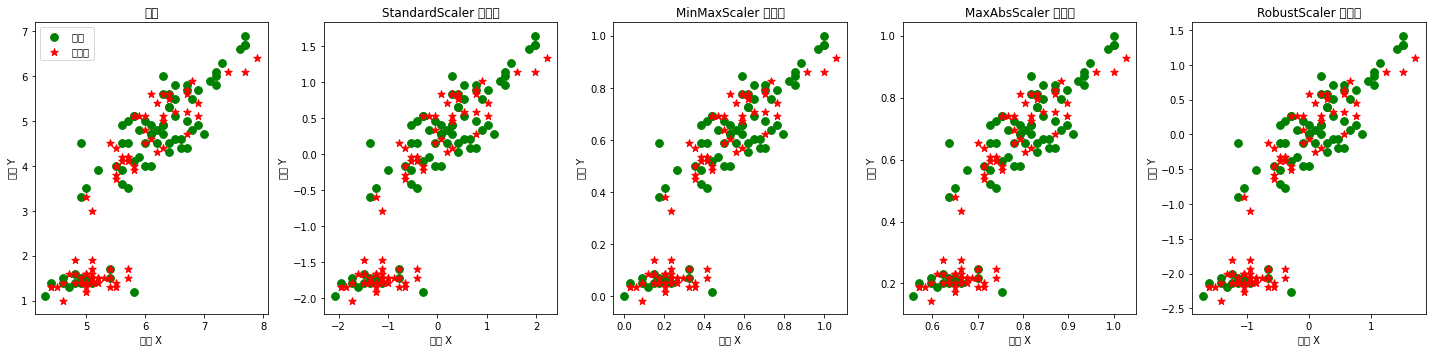

In [22]:
# 스케일러 선택을 위한 코드

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1],
                c= 'green', label="훈련 ", s=60)
axes[0].scatter(X_test.to_numpy()[:, 0], X_test.to_numpy()[:, 1], marker='*',
                c= 'red', label="테스트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본")

# StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled1 = scaler.transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

axes[1].scatter(X_train_scaled1[:, 0], X_train_scaled1[:, 1],
                c= 'green', label="훈련", s=60)
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1], marker='*',
                c='red', label="테스트", s=60)
axes[1].set_title("StandardScaler 데이터")


# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

axes[2].scatter(X_train_scaled2[:, 0], X_train_scaled2[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[2].set_title("MinMaxScaler 데이터")



# MaxAbsScaler 
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled3 = scaler.transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

axes[3].scatter(X_train_scaled3[:, 0], X_train_scaled3[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[3].scatter(X_test_scaled3[:, 0], X_test_scaled3[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[3].set_title("MaxAbsScaler 데이터")





# RobustScaler 
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled4 = scaler.transform(X_train)
X_test_scaled4 = scaler.transform(X_test)

axes[4].scatter(X_train_scaled4[:, 0], X_train_scaled4[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[4].scatter(X_test_scaled4[:, 0], X_test_scaled4[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[4].set_title("RobustScaler 데이터")



for ax in axes:
    ax.set_xlabel("특성 X")
    ax.set_ylabel("특성 Y")
fig.tight_layout()

In [23]:
# Robust 사용
X_train_scaled3

array([[0.57142857, 0.20289855, 1.        , 0.        , 0.        ],
       [0.83116883, 0.65217391, 0.        , 1.        , 0.        ],
       [0.80519481, 0.69565217, 0.        , 0.        , 1.        ],
       [0.93506494, 0.88405797, 0.        , 0.        , 1.        ],
       [0.63636364, 0.20289855, 1.        , 0.        , 0.        ],
       [0.84415584, 0.84057971, 0.        , 0.        , 1.        ],
       [0.55844156, 0.15942029, 1.        , 0.        , 0.        ],
       [0.87012987, 0.72463768, 0.        , 1.        , 0.        ],
       [0.88311688, 0.69565217, 0.        , 1.        , 0.        ],
       [0.85714286, 0.63768116, 0.        , 1.        , 0.        ],
       [0.64935065, 0.50724638, 0.        , 1.        , 0.        ],
       [0.81818182, 0.71014493, 0.        , 0.        , 1.        ],
       [0.81818182, 0.68115942, 0.        , 1.        , 0.        ],
       [0.5974026 , 0.2173913 , 1.        , 0.        , 0.        ],
       [0.75324675, 0.17391304, 1.

In [62]:
# 딥러닝 모델

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics=['mae'])
    
    return model



In [75]:
# 1.sepal width 예측

# early stopping 을 사용하여 과대적합 방지
early_stopping = EarlyStopping(monitor='val_loss',  patience=100)
""" monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
auto : 관찰하는 이름에 따라 자동으로 지정합니다."""


model = build_model(num_input=5)
history = model.fit(X_train_scaled3, y_train['sepal width (cm)'], batch_size=15, epochs=100, validation_split=0.35, verbose=2,callbacks=[early_stopping])




"""
#Epoch 1000/1000
#3/3 - 0s - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0743 - val_mse: 0.0743

#Epoch 215/500
#3/3 - 0s - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0651 - val_mse: 0.0651
#Epoch 216/500
#3/3 - 0s - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0650 - val_mse: 0.0650

Epoch 1195/2000
3/3 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 1196/2000
3/3 - 0s - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 1197/2000
3/3 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0774 - val_mse: 0.0774

"""

'\n#Epoch 1000/1000\n#3/3 - 0s - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0743 - val_mse: 0.0743\n\n#Epoch 215/500\n#3/3 - 0s - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0651 - val_mse: 0.0651\n#Epoch 216/500\n#3/3 - 0s - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0650 - val_mse: 0.0650\n\nEpoch 1195/2000\n3/3 - 0s - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0771 - val_mse: 0.0771\nEpoch 1196/2000\n3/3 - 0s - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0761 - val_mse: 0.0761\nEpoch 1197/2000\n3/3 - 0s - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0774 - val_mse: 0.0774\n\n'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [ ]:
lrIris = submission.copy()
lrIris['sepal width (cm)']=model.predict(X_test_scaled3)

In [ ]:
# 2.petal width 예측


model.evaluate(X_train_scaled3, y_train['petal width (cm)'])

model = build_model(num_input=5)
history = model.fit(X_train_scaled3, y_train['petal width (cm)'], batch_size=20, epochs=20000, validation_split=0.35, verbose=2,callbacks=[early_stopping])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()
#Epoch 1000/1000
#3/3 - 0s - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0434 - val_mse: 0.0434

In [ ]:
lrIris['petal width (cm)']=model.predict(X_test_scaled3)

In [ ]:
lrIris
lrIris.to_csv('lr_20211027_6.csv',index=False)